In [11]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from fancyimpute import KNN

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [68]:
rent = pd.read_csv('../data/rents_with_fx.csv', parse_dates=['date'])  

train = pd.read_csv('../data/clean_train_all_cols_chase.csv', parse_dates=['timestamp'], index_col='id')
moscow = pd.read_csv('../data/moscow_index_raw.csv',header=None,parse_dates=[0])

,0,1
0,2000-07-08,19060.6
1,2000-08-03,19060.6
2,2000-08-29,19060.6
3,2000-09-24,19060.6
4,2000-10-20,19060.6


In [74]:
train['month_year'] = pd.PeriodIndex(train['timestamp'], freq='M').strftime('%m/%y')
moscow['month_year'] = pd.PeriodIndex(moscow[0], freq='M').strftime('%m/%y')

In [33]:
rent.drop('Unnamed: 0',axis=1,inplace=True)

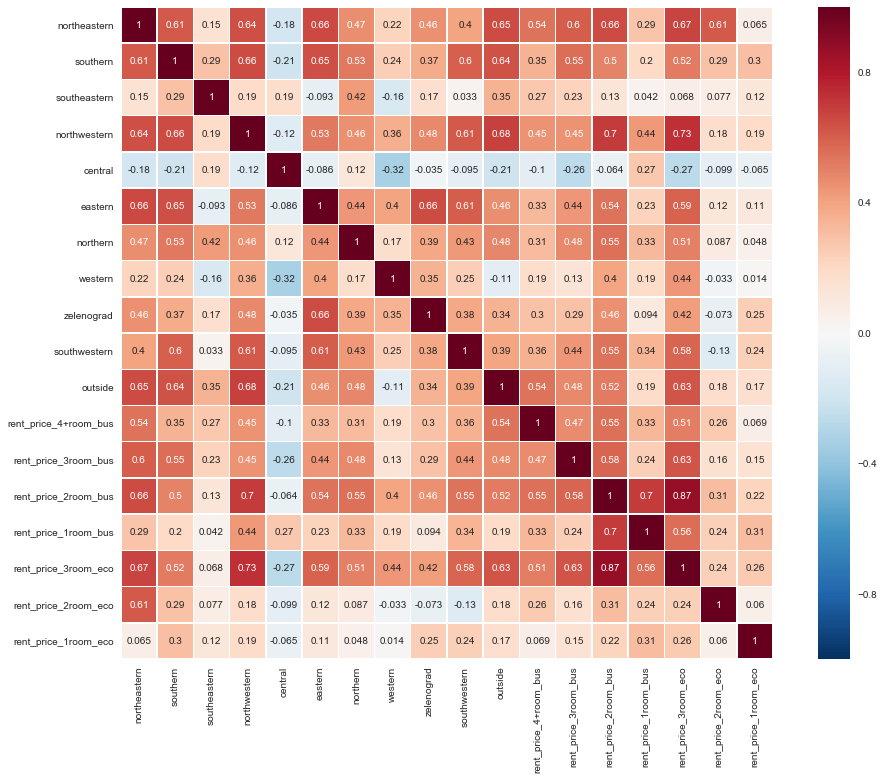

In [62]:
train_grouped = train.groupby(['okurg_district','month_year']).price_full.median()
districts = train.okurg_district.unique().tolist()
train_multiples = pd.DataFrame({'month_year':train.month_year.unique().tolist()})

for d in districts:
#     temp = pd.concat([temp,pd.DataFrame({d:train_grouped[d]})])
    x = pd.DataFrame({d:train_grouped[d]}).reset_index()
    train_multiples = pd.merge(train_multiples,x,how="left")

temp = train_multiples.merge(rent, how='left',on="month_year")
temp.sort_values('date',inplace=True)

temp.drop(['usdrub','eurrub'],axis=1,inplace=True)

f, ax = plt.subplots(figsize=(16, 12))
plt.xticks(rotation='90')
sns.heatmap(temp.corr(), square=True, linewidths=.5, annot=True)

In [65]:
rent_lagged = rent.copy()
# rent_lagged = rent[1:8].shift(periods=-1)

In [66]:
for i in range(1,8):
    rent_lagged.iloc[:,i] = rent_lagged.iloc[:,i].shift(periods=-3)

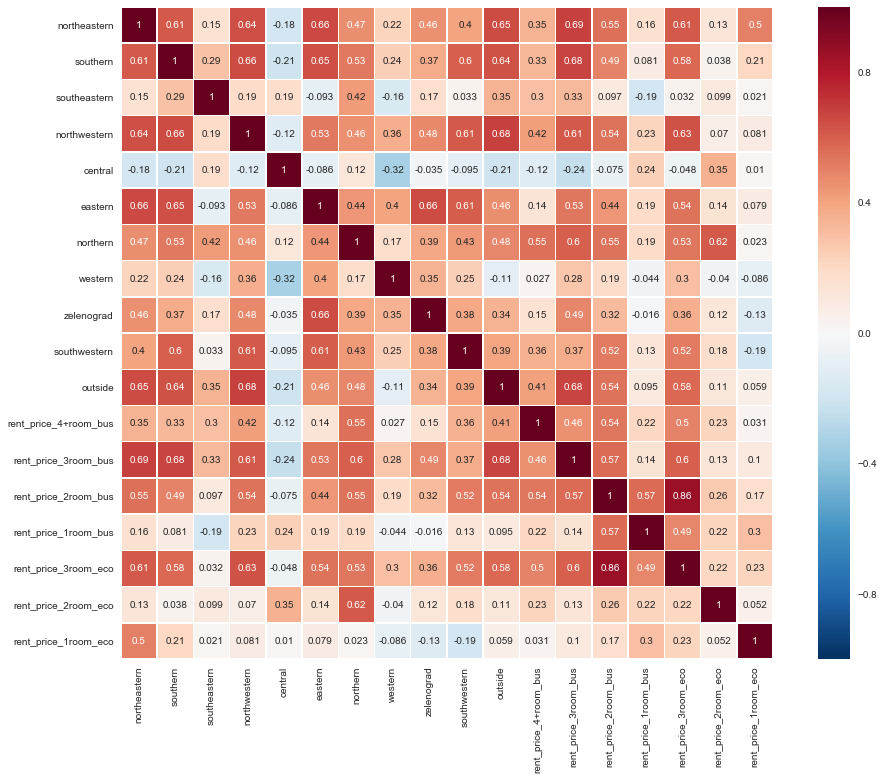

In [67]:
# rent_lagged = rent.shift(periods=-1)
train_grouped = train.groupby(['okurg_district','month_year']).price_full.median()
districts = train.okurg_district.unique().tolist()
train_multiples = pd.DataFrame({'month_year':train.month_year.unique().tolist()})

for d in districts:
#     temp = pd.concat([temp,pd.DataFrame({d:train_grouped[d]})])
    x = pd.DataFrame({d:train_grouped[d]}).reset_index()
    train_multiples = pd.merge(train_multiples,x,how="left")

temp = train_multiples.merge(rent_lagged, how='left',on="month_year")
temp.sort_values('date',inplace=True)

temp.drop(['usdrub','eurrub'],axis=1,inplace=True)

f, ax = plt.subplots(figsize=(16, 12))
plt.xticks(rotation='90')
sns.heatmap(temp.corr(), square=True, linewidths=.5, annot=True)

,northeastern,southern,southeastern,northwestern,central,eastern,northern,western,zelenograd,southwestern,outside,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco
northeastern,1.0,0.6,0.2,0.6,-0.2,0.7,0.5,0.2,0.5,0.4,0.7,0.5,0.6,0.7,0.3,0.7,0.6,0.1
southern,0.6,1.0,0.3,0.7,-0.2,0.6,0.5,0.2,0.4,0.6,0.6,0.3,0.6,0.5,0.2,0.5,0.3,0.3
southeastern,0.2,0.3,1.0,0.2,0.2,-0.1,0.4,-0.2,0.2,0.0,0.4,0.3,0.2,0.1,0.0,0.1,0.1,0.1
northwestern,0.6,0.7,0.2,1.0,-0.1,0.5,0.5,0.4,0.5,0.6,0.7,0.4,0.5,0.7,0.4,0.7,0.2,0.2
central,-0.2,-0.2,0.2,-0.1,1.0,-0.1,0.1,-0.3,-0.0,-0.1,-0.2,-0.1,-0.3,-0.1,0.3,-0.3,-0.1,-0.1
eastern,0.7,0.6,-0.1,0.5,-0.1,1.0,0.4,0.4,0.7,0.6,0.5,0.3,0.4,0.5,0.2,0.6,0.1,0.1
northern,0.5,0.5,0.4,0.5,0.1,0.4,1.0,0.2,0.4,0.4,0.5,0.3,0.5,0.5,0.3,0.5,0.1,0.0
western,0.2,0.2,-0.2,0.4,-0.3,0.4,0.2,1.0,0.3,0.2,-0.1,0.2,0.1,0.4,0.2,0.4,-0.0,0.0
zelenograd,0.5,0.4,0.2,0.5,-0.0,0.7,0.4,0.3,1.0,0.4,0.3,0.3,0.3,0.5,0.1,0.4,-0.1,0.2
southwestern,0.4,0.6,0.0,0.6,-0.1,0.6,0.4,0.2,0.4,1.0,0.4,0.4,0.4,0.5,0.3,0.6,-0.1,0.2
